In [1]:
#import required libraries
import pandas as pd #For working with dataset
import numpy as np #For basic calculations
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [2]:
#Importing the data
df_credit = pd.read_csv("loan.csv",index_col=0)

C:\Users\Jyoti\AppData\Local\Temp\ipykernel_26904\3240132237.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_credit = pd.read_csv("loan.csv",index_col=0)


In [3]:
#Check the dataset info 
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Columns: 110 entries, member_id to total_il_high_credit_limit
dtypes: float64(74), int64(12), object(24)
memory usage: 33.6+ MB
None


In [4]:
#Check sample data 
df_credit.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#Check missing values
df_credit.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 110, dtype: int64

In [6]:
#To check number of columns with null values
print(df_credit.isnull().all(axis=0).sum())

54


In [7]:
#There are 54 variables with all NULL values, Removing all irrelavant variables and keeping only relavant variables.
# loan_status is the target variable 

df_credit.drop(df_credit.iloc[:, 53:105], inplace = True, axis = 1) 


In [8]:
#Dropping columns with mostly null values 
columns = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim","mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit",
          "url","emp_title","zip_code","tax_liens"]
df_credit.drop(labels = columns, axis =1, inplace=True)

In [9]:
df_credit.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,annual_inc_joint
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,NaN


In [10]:
df_credit.shape

(39717, 45)

In [11]:
# Data cleaning
# Lets remove % symbol from intrest rate column so that it can be used in calculations
df_credit['int_rate'] = df_credit['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
df_credit['revol_util'] = df_credit['revol_util'].str.rstrip('%')

In [12]:
#loan_status should be the target variable

(df_credit.loan_status.value_counts()*100)/len(df_credit)

#Observation: 82.96% customers have paid full amount, 14.16% customers are default customers and remaining 2.87% customers did not completed the loan tenure yet.

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [13]:
#Dropping rows with Loan_status=='Current' 
df_credit.drop(df_credit[(df_credit['loan_status'] =='Current')].index, inplace=True)



In [14]:
(df_credit.loan_status.value_counts()*100)/len(df_credit)


Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [15]:

#Manipulate the target column to create binary variables


def bad(df_credit) :
    
    if df_credit["loan_status"] == 'Charged Off' :
        return "1"
    else:
        return "0"
df_credit["loan_status"] = df_credit.apply(lambda df_credit:bad(df_credit),
                                      axis = 1)


In [16]:
# Lets take a look on important variable purpose of loan in total loans issued

(df_credit.purpose.value_counts()*100)/len(df_credit)

# Observations
# Most of the loans taken for debt consolidation(47%) and Credit card bill payment
# Other is also one of the main area where loans were taken.

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

# Univariate analysis
    

In [17]:
#Loan_amnt can be important variable. Lets investigate the same variable.
df_credit['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

C:\Users\Jyoti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

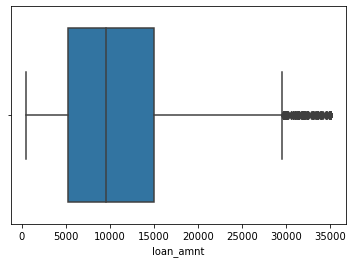

In [18]:
sns.boxplot(df_credit.loan_amnt)
#Observation: there are outliers in the variable on higher end.

In [19]:
# Basic statistics with .describe() -Quantitative Variables
df_credit.total_pymnt.describe()

count    38577.000000
mean     11866.970365
std       8809.856227
min          0.000000
25%       5513.497338
50%       9674.048405
75%      16136.952430
max      58563.679930
Name: total_pymnt, dtype: float64

C:\Users\Jyoti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_pymnt'>

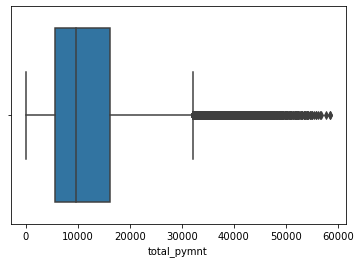

In [20]:
sns.boxplot(df_credit.total_pymnt)
#Since there are outliers in loan amount variable at higher end therefore there are outliers in total_payment variable on higher end

In [21]:
# work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

In [22]:
df_credit.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,annual_inc_joint
count,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,...,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38521.0,38577.0,0.0
mean,8.422843e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,...,11271.196153,9648.322898,2119.243370,1.368634,98.035545,12.772728,2746.243218,0.0,1.0,NaN
std,2.644519e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,...,8700.845592,7009.381200,2389.499511,7.315880,698.650182,150.836853,4494.648131,0.0,0.0,NaN
min,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,NaN
25%,6.611310e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,...,5019.590000,4500.000000,643.990000,0.000000,0.000000,0.000000,217.420000,0.0,1.0,NaN
50%,8.392920e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,...,9066.660000,8000.000000,1300.450000,0.000000,0.000000,0.000000,568.260000,0.0,1.0,NaN
75%,1.037336e+06,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,...,15329.780000,13175.000000,2671.980000,0.000000,0.000000,0.000000,3447.250000,0.0,1.0,NaN
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,...,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,NaN


# Good and bad customers univariate

In [23]:
df_credit.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,annual_inc_joint
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,...,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,...,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,NaN
1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,...,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,NaN


In [24]:
# Univariet analysis for Good vs Bad credit.
#To check the distribution of Good and Bad customers.

tr0 = go.Bar(
            x = df_credit[df_credit["loan_status"]== "0"]["loan_status"].value_counts().index.values,
            y = df_credit[df_credit["loan_status"]== "0"]["loan_status"].value_counts().values,
            name='Good credit'
    )

tr1 = go.Bar(
            x = df_credit[df_credit["loan_status"]== "1"]["loan_status"].value_counts().index.values,
            y = df_credit[df_credit["loan_status"]== "1"]["loan_status"].value_counts().values,
            name='Bad credit'
    )

data = [tr0, tr1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Delinquency'
    ),
    title='Good/Bad credit distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [25]:
#there are total 5627 bads and remaining 32.95k good customers are there which traslate that 14.16% customers are bad customers

In [26]:
#Lets explore the variable inq_last_6mths
#assumption is higher the number of inquiries riskier is the customer

df_good = df_credit.loc[df_credit["loan_status"] == '0']['inq_last_6mths'].values.tolist()
df_bad = df_credit.loc[df_credit["loan_status"] == '1']['inq_last_6mths'].values.tolist()
df_age = df_credit['inq_last_6mths'].values.tolist()

#First plot
tr0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good inquiries"
)
#Second plot
tr1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad inquiries"
)
#Third plot
tr2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall inquiries"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)
fig.append_trace(tr2, 2, 1)

fig['layout'].update(showlegend=True, title='number of inquiries Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\Jyoti\anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [28]:
#lets investigate revol_bal variable

df_good = df_credit.loc[df_credit["loan_status"] == '0']['revol_bal'].values.tolist()
df_bad = df_credit.loc[df_credit["loan_status"] == '1']['revol_bal'].values.tolist()
df_age = df_credit['revol_bal'].values.tolist()

#First plot
tr0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good revolving amount"
)
#Second plot
tr1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad revolving amount"
)
#Third plot
tr2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall revolving amount"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)
fig.append_trace(tr2, 2, 1)

fig['layout'].update(showlegend=True, title='number of inquiries Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\Jyoti\anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [29]:
#Instead of exploring variables one by one lets check the correlation 

In [30]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.

credit_correlation = df_credit.corr()

# Observations :
#Loan amount, investor amount, funding amount are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalted.
# Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
# That means when annual income is low DTI is high & vice versa.
# positive correlation between annual income and employment years.
# That means income increases with work experience ;)

In [31]:
credit_correlation
# Observation is that Loan amount, installment amount, funding amount are strongly correlated

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,annual_inc_joint
member_id,1.000000,0.120393,0.130307,0.241324,0.070918,0.006442,0.092910,-0.007905,-0.045879,0.013804,...,0.205195,0.093773,0.126660,-0.058497,0.036526,-0.012831,0.142582,NaN,NaN,NaN
loan_amnt,0.120393,1.000000,0.981790,0.937922,0.932260,0.268999,0.062436,-0.031951,0.012940,0.177200,...,0.847635,0.845870,0.728343,0.047103,0.142789,0.077005,0.474614,NaN,NaN,NaN
funded_amnt,0.130307,0.981790,1.000000,0.956172,0.958035,0.264798,0.062194,-0.031866,0.012857,0.175682,...,0.864501,0.864082,0.736654,0.049465,0.143452,0.078769,0.478448,NaN,NaN,NaN
funded_amnt_inv,0.241324,0.937922,0.956172,1.000000,0.905464,0.251981,0.070663,-0.038171,-0.002800,0.162738,...,0.909127,0.838587,0.726736,0.029379,0.130997,0.064282,0.469166,NaN,NaN,NaN
installment,0.070918,0.932260,0.958035,0.905464,1.000000,0.267842,0.052038,-0.019755,0.011014,0.172893,...,0.817665,0.847762,0.642655,0.058387,0.121463,0.077519,0.413588,NaN,NaN,NaN
annual_inc,0.006442,0.268999,0.264798,0.251981,0.267842,1.000000,-0.121530,0.022229,0.035465,0.156927,...,0.245198,0.256848,0.185056,0.006814,0.022184,0.015981,0.143242,NaN,NaN,NaN
dti,0.092910,0.062436,0.062194,0.070663,0.052038,-0.121530,1.000000,-0.033347,0.002178,0.287849,...,0.066277,0.036755,0.103104,-0.011412,0.026162,0.011744,0.008566,NaN,NaN,NaN
delinq_2yrs,-0.007905,-0.031951,-0.031866,-0.038171,-0.019755,0.022229,-0.033347,1.000000,0.008733,0.011649,...,-0.029608,-0.038447,0.023778,0.028772,0.012443,0.014077,-0.012511,NaN,NaN,NaN
inq_last_6mths,-0.045879,0.012940,0.012857,-0.002800,0.011014,0.035465,0.002178,0.008733,1.000000,0.093434,...,-0.018589,-0.021328,0.026549,0.030741,0.018899,0.012388,0.027772,NaN,NaN,NaN
open_acc,0.013804,0.177200,0.175682,0.162738,0.172893,0.156927,0.287849,0.011649,0.093434,1.000000,...,0.152008,0.159997,0.123478,-0.018827,0.017241,0.006674,0.082396,NaN,NaN,NaN


In [32]:
# Data cleaning
# Drop additional columns which are not needed further in analysis.

columns_drop_list = ["out_prncp","out_prncp_inv","collections_12_mths_ex_med","policy_code","annual_inc_joint"]
df_credit.drop(labels = columns_drop_list, axis =1, inplace=True)
print(df_credit.shape)
df_credit.isnull().sum()

(38577, 40)


member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                        11
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
initial_list_status           0
total_pymnt                   0
total_pymnt_inv               0
total_re

In [36]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
df_credit['loan_amnt_cats'] = pd.cut(df_credit['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
df_credit['annual_inc_cats'] = pd.cut(df_credit['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])


# categorise dti into buckets for bivariate analysis.
df_credit['dti_cats'] = pd.cut(df_credit['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [37]:
df_credit.shape

(38577, 43)

C:\Users\Jyoti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Jyoti\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.

C:\Users\Jyoti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Jyoti\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, 

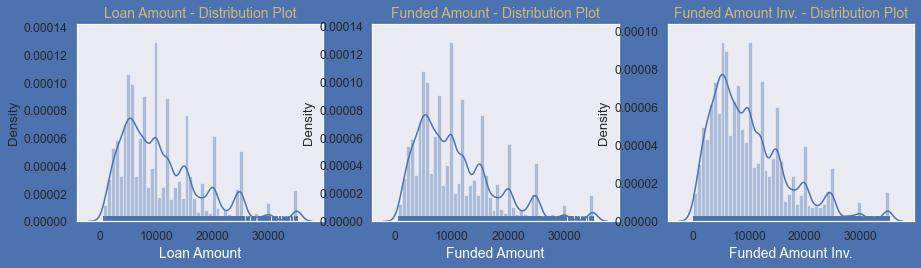

In [39]:
# Lets see distribution of three loan amount fields using distribution plot.


plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(df_credit['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='y')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(df_credit['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='y')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(df_credit['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='y')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()


C:\Users\Jyoti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\Jyoti\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



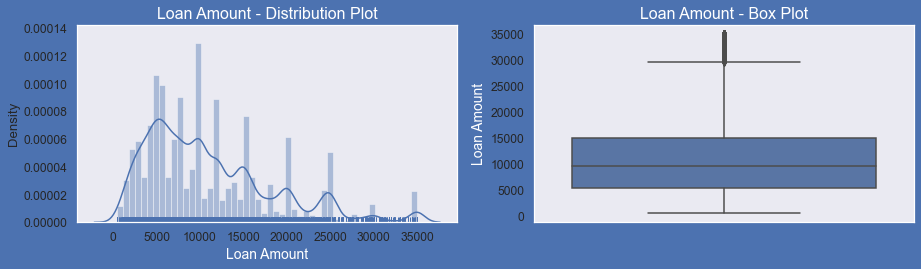

In [40]:
# Univariate Analysis on Loan amount

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(df_credit['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=df_credit['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000
#There are outliers on higher side of loan amount.

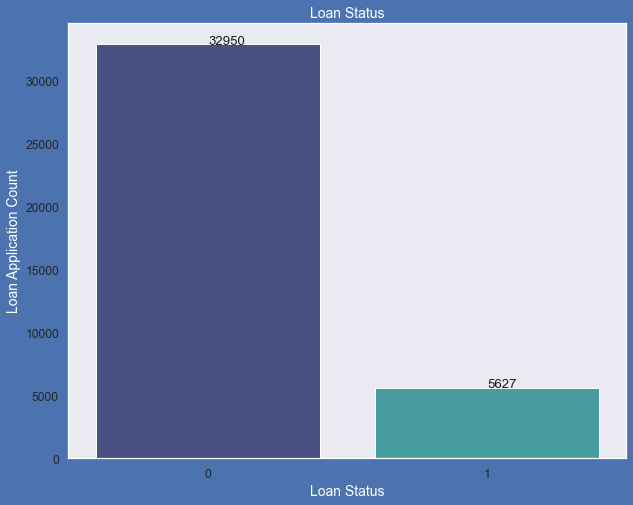

In [43]:
 
#Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=df_credit,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=df_credit['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# approximate 14% loans were charged off out of total loan issued.

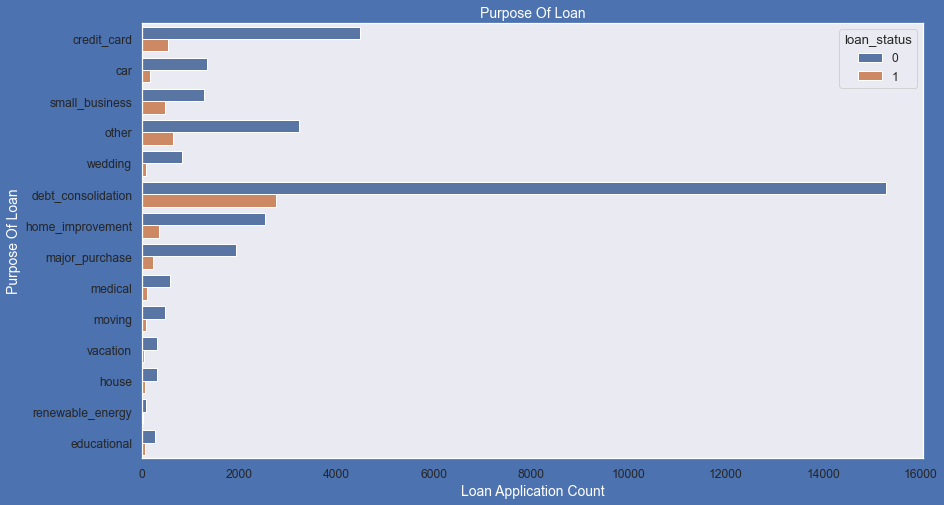

In [45]:
# Univariate Analysis  - Purpose Of Loan

plt.figure(figsize=(14,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(y="purpose",data=df_credit,hue='loan_status')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.

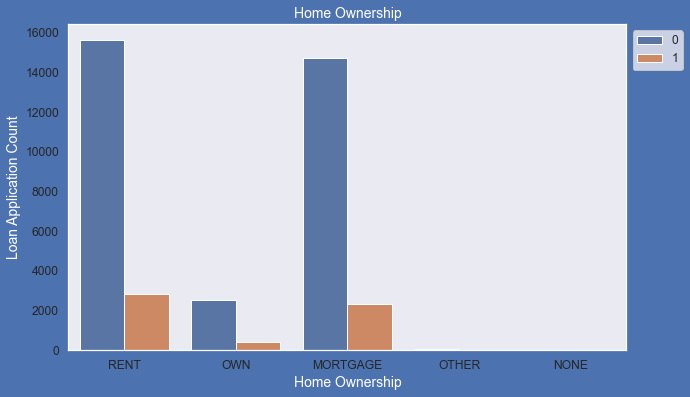

In [47]:
# Univariate Analysis - Home Ownership
#Assumption : customers with rented appartments are more likely to be default.

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=df_credit,hue='loan_status')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
#  most of the customers living in rented home or mortgazed home.
# Assumption made is holding true

In [48]:
#Overall Observations:

#1. Amount related variables are more significant and can be consider for decision making.
#2. Home Ownership is a significant variable wich can be used for decision 
#3. inquiry , revolving and other behaviour variables are not significant and should not be considered in decision making.

In [49]:
#Bivariate Analysis

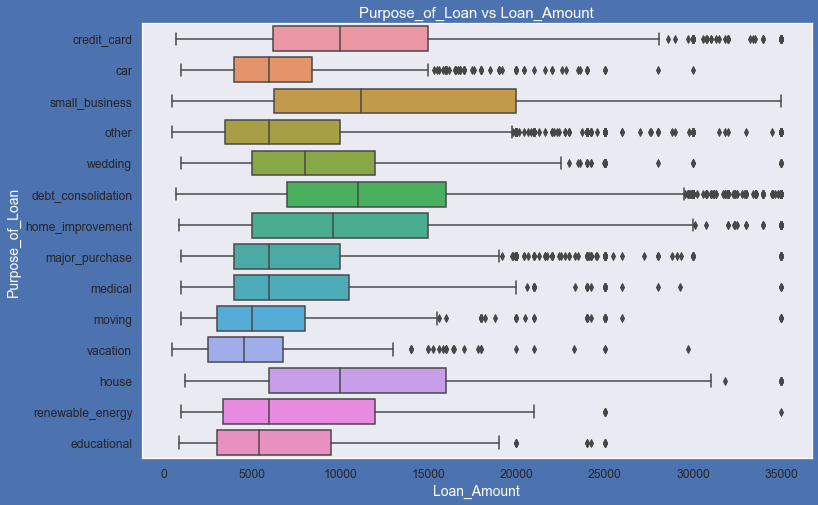

In [54]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

plt.figure(figsize=(12,8),facecolor='b')
ax = sns.boxplot(y='purpose', x='loan_amnt', data =df_credit)
ax.set_title('Purpose_of_Loan vs Loan_Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose_of_Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan_Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Median of loan amount is highest for loan taken for small business purpose among all purposes.
# Debt consolidation is second and Credit card is at 3rd position.